In [38]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('./data/student-mat.csv',sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [41]:
features = ['G1','G2','G3','studytime','failures','absences']
predict = 'G3'

df = df[features]


X = np.array(df.drop(predict,axis=1))

y = np.array(df[predict])

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [43]:
linear = linear_model.LinearRegression()

linear.fit(x_train,y_train)

efficiancy = linear.score(x_test,y_test)

print(f'Efficiancy {efficiancy}')

Efficiancy 0.8795978301112638


In [44]:
print(f'Coefficients: {linear.coef_}')
print(f'Interceptor: {linear.intercept_}')


Coefficients: [ 0.16345981  0.97566917 -0.18688794 -0.23331601  0.03559756]
Interceptor: -1.5808531710460922


In [45]:
predicted_scores = linear.predict(x_test)

for i in range(len(predicted_scores)):
    print(f'Predicted score: {predicted_scores[i]}, Actual score: {y_test[i]}')

Predicted score: 5.968075363948822, Actual score: 7
Predicted score: 6.1564613701662445, Actual score: 8
Predicted score: 19.925835103873837, Actual score: 19
Predicted score: 15.13230570382421, Actual score: 15
Predicted score: 10.810444694528794, Actual score: 12
Predicted score: 18.54079250049275, Actual score: 19
Predicted score: 9.436660787696342, Actual score: 10
Predicted score: 11.808522365371166, Actual score: 12
Predicted score: 14.183333934447639, Actual score: 14
Predicted score: 10.973904504636282, Actual score: 11
Predicted score: -0.973870183914465, Actual score: 0
Predicted score: 9.2764702546812, Actual score: 11
Predicted score: 14.635271656708712, Actual score: 13
Predicted score: 10.26194620240704, Actual score: 11
Predicted score: 7.6581075303564905, Actual score: 7
Predicted score: 11.045099618135671, Actual score: 11
Predicted score: 13.040935674129715, Actual score: 12
Predicted score: 7.677838198849626, Actual score: 8
Predicted score: 4.930270385184721, Actual

In [46]:
# Saving algorithm
import pickle

with open('Linear-regression.pickle','wb') as f:
    pickle.dump(linear,f)

    

In [47]:
pickle_input = open('./Linear-regression.pickle','rb')
saved_linear = pickle.load(pickle_input)

predicted_scores_saved = linear.predict(x_test)

for i in range(len(predicted_scores_saved)):
    print(f'Predicted score: {predicted_scores_saved[i]}, Actual score: {y_test[i]}')

Predicted score: 5.968075363948822, Actual score: 7
Predicted score: 6.1564613701662445, Actual score: 8
Predicted score: 19.925835103873837, Actual score: 19
Predicted score: 15.13230570382421, Actual score: 15
Predicted score: 10.810444694528794, Actual score: 12
Predicted score: 18.54079250049275, Actual score: 19
Predicted score: 9.436660787696342, Actual score: 10
Predicted score: 11.808522365371166, Actual score: 12
Predicted score: 14.183333934447639, Actual score: 14
Predicted score: 10.973904504636282, Actual score: 11
Predicted score: -0.973870183914465, Actual score: 0
Predicted score: 9.2764702546812, Actual score: 11
Predicted score: 14.635271656708712, Actual score: 13
Predicted score: 10.26194620240704, Actual score: 11
Predicted score: 7.6581075303564905, Actual score: 7
Predicted score: 11.045099618135671, Actual score: 11
Predicted score: 13.040935674129715, Actual score: 12
Predicted score: 7.677838198849626, Actual score: 8
Predicted score: 4.930270385184721, Actual

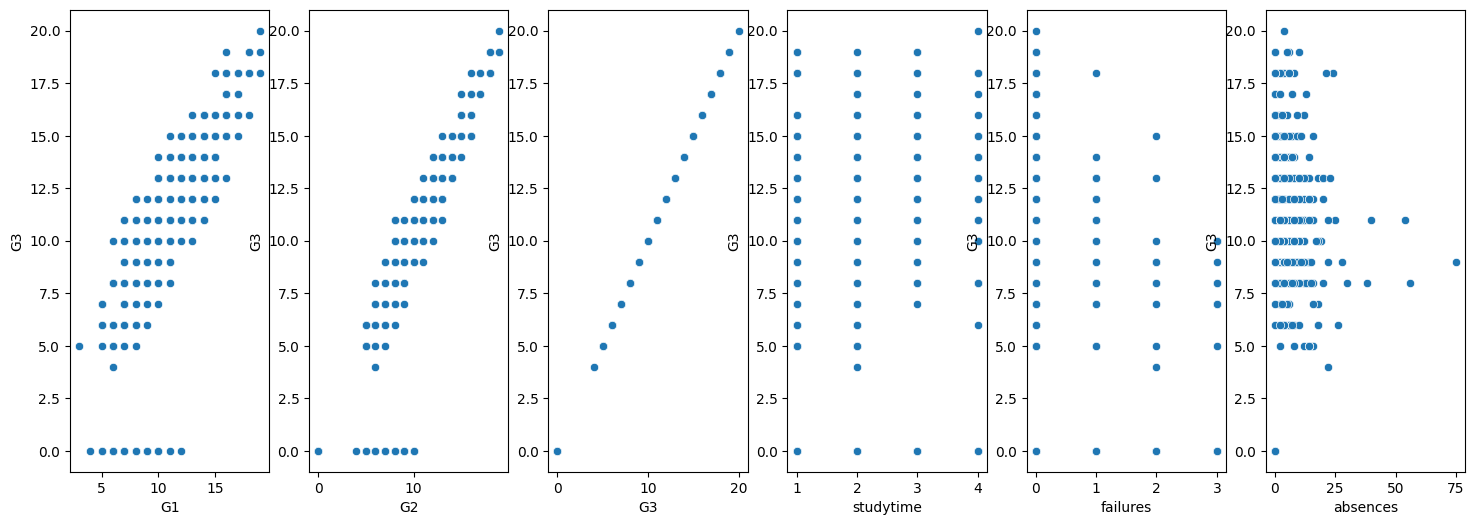

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=len(features), figsize=(18, 6))
for feature_index in range(len(features)):
    sns.scatterplot(x=features[feature_index],y=predict,data=df,ax=axs[feature_index])